# PORTFOLIO ANALYSIS IN PYTHON 

      In this tutorial, we we'll use the power of python to understand how to emprically manage a portfolio. But before jumping into our tutorial, let's understand what is a portfolio first 

*A portfolio is a collection of financial assets in order to have a better risk-return reward. Indeed, rather than investing only in one financial asset & being subject to many fluctuations, many investors prefers investing in a **collection** of assets. Thus, they can intuitively reduce the risk from exposure to any company. Such a **collection** is called a **portfolio**. A **portfolio** is hence, a **collection** of assets whose the aim is to diversify or hedge the risk that araises from the exposure to any individual company & to create many complexes strategies based on the relations between assets*
*

> let's import the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

In [2]:
portfolio = pd.read_csv('https://assets.datacamp.com/production/repositories/4745/datasets/da4863e3ea40482a56929e595f1a7c6e1fdaf614/small_portfolio.csv')
portfolio.head()

,date,GE,JPM,MSFT,PG
0,2015-01-02,25.06,62.49,46.760,90.44
1,2015-01-05,24.60,60.55,46.325,90.01
2,2015-01-06,24.07,58.98,45.650,89.60
3,2015-01-07,24.08,59.07,46.230,90.07
4,2015-01-08,24.37,60.39,47.590,91.10


In [3]:
portfolio.set_index('date',inplace=True)

In [4]:
portfolio.index = pd.to_datetime(portfolio.index)

In [5]:
portfolio.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [6]:
portfolio = portfolio.asfreq('B')
portfolio.isnull().sum()

GE      30
JPM     30
MSFT    30
PG      30
dtype: int64

In [7]:
portfolio = portfolio.interpolate(method='linear')

In [8]:
portfolio.isnull().sum()

GE      0
JPM     0
MSFT    0
PG      0
dtype: int64

In [9]:
portfolio.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


> let's plot our data & visualize it 

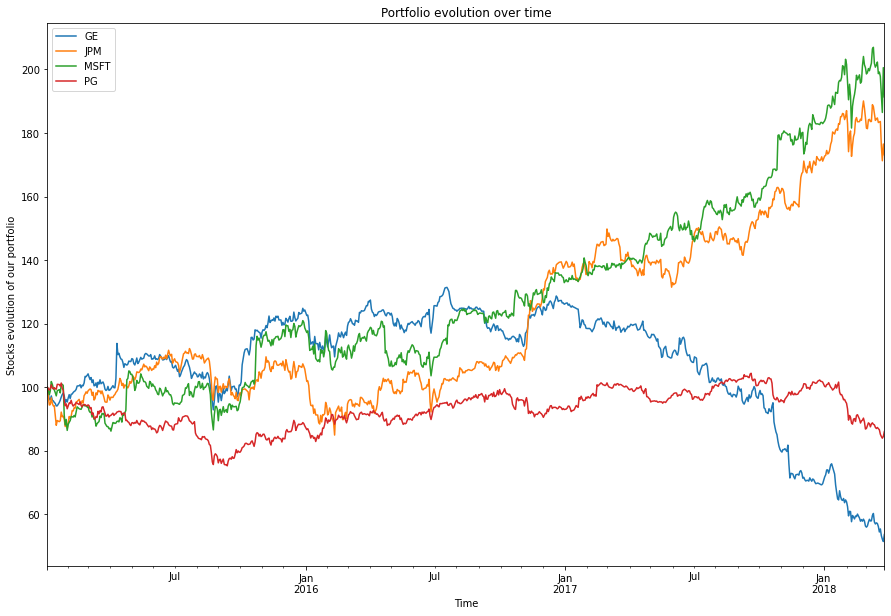

In [10]:
portfolio.div(portfolio.iloc[0]).mul(100).plot(kind='line',figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('Stocks evolution of our portfolio')
plt.title('Portfolio evolution over time')
plt.show()

> let's define our portfolio weighst

*Weights can be defined as the portion of our total money we would want to invest in any of the stocks that are in our portfolio. In python, it can easilly be done with numpy*

In [11]:
numstocks = len(portfolio.columns)
weights = np.repeat(1/numstocks,numstocks)

In [12]:
weights   # we just define our first equiweighted portfolio

array([0.25, 0.25, 0.25, 0.25])

**Portfolio return**

In [13]:
portfolio_return = portfolio.pct_change()
portfolio_return.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


**Portfolio mean return**

In [14]:
portfolio_mean_return = portfolio_return.mean()
portfolio_mean_return

GE     -0.000653
JPM     0.000740
MSFT    0.000874
PG     -0.000140
dtype: float64

In [15]:
mean_return = portfolio_mean_return.dot(weights)
mean_return 

0.00020522633480341858

**Portfolio cumulative return**

In [16]:
portfolio_portfolio = portfolio_return.dot(weights)
portfolio_portfolio.head()

date
2015-01-02         NaN
2015-01-05   -0.015865
2015-01-06   -0.016650
2015-01-07    0.004973
2015-01-08    0.018811
Freq: B, dtype: float64

In [17]:
portfolio_cumulative_return = (1 + portfolio_portfolio).cumprod()
portfolio_cumulative_return

date
2015-01-02         NaN
2015-01-05    0.984135
2015-01-06    0.967750
2015-01-07    0.972562
2015-01-08    0.990857
                ...   
2018-03-21    1.177969
2018-03-22    1.143455
2018-03-23    1.119636
2018-03-26    1.147447
2018-03-27    1.146119
Freq: B, Length: 843, dtype: float64

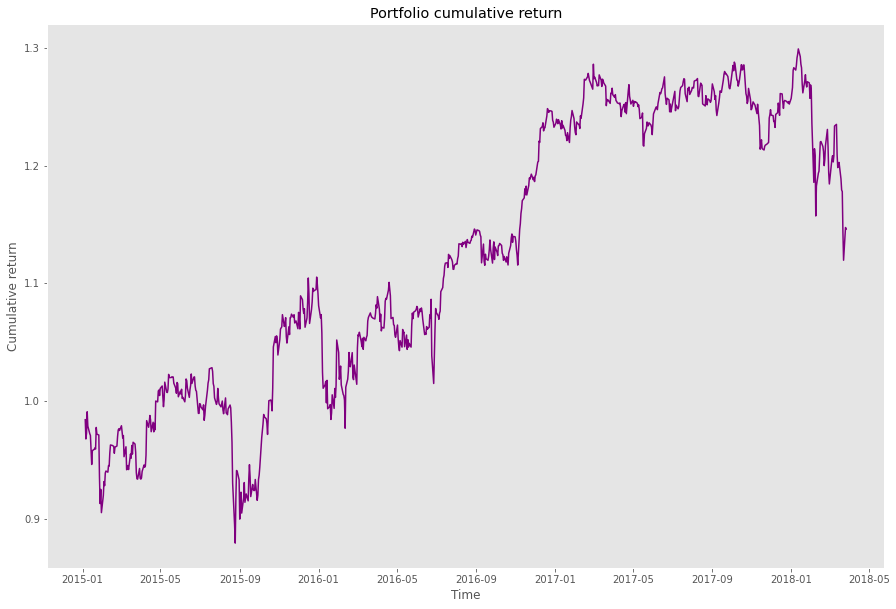

In [18]:
plt.style.use('ggplot')
fig , ax = plt.subplots(figsize=(15,10))
ax.plot(portfolio_cumulative_return,color='purple',label='Portfolio cumulative return')
ax.set_xlabel('Time')
ax.set_ylabel('Cumulative return')
ax.set_title('Portfolio cumulative return')
ax.grid(False)
plt.show()

**Annualized return**

In [19]:
sp500 = pd.read_csv('/Users/nacersere/Downloads/sp500.csv')
sp500.head()

,date,S&P500
0,2015-01-02,2058.199951
1,2015-01-05,2020.579956
2,2015-01-06,2002.609985
3,2015-01-07,2025.900024
4,2015-01-08,2062.139893


In [20]:
sp500.set_index('date',inplace=True)

In [21]:
sp500.index = pd.to_datetime(sp500.index)

In [22]:
sp500.rename(columns={'S&P500':'Value'},inplace=True)

In [23]:
sp500.head()

,Value
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


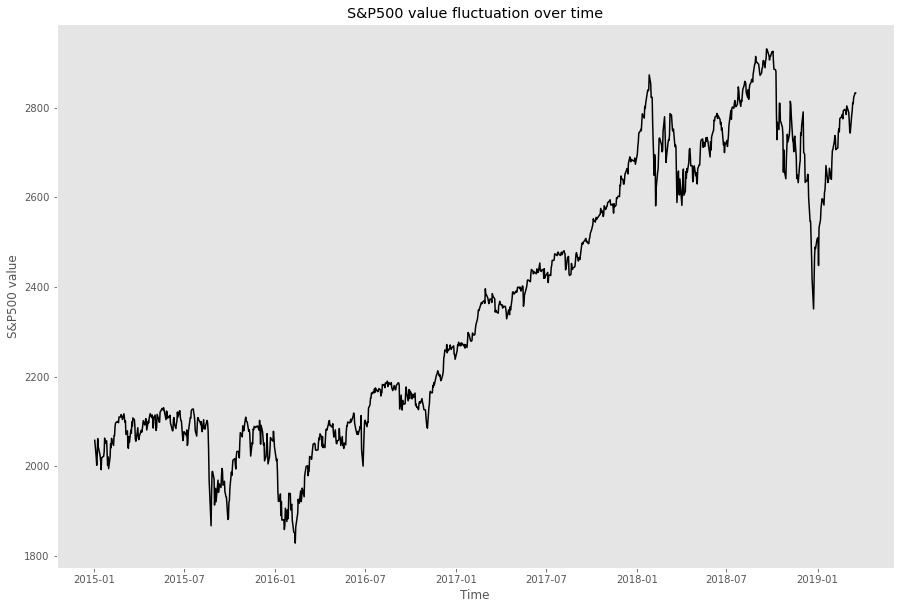

In [24]:
fig , ax = plt.subplots(figsize=(15,10))
ax.plot(sp500['Value'],color='black')
ax.set_xlabel('Time')
ax.set_ylabel('S&P500 value')
ax.set_title('S&P500 value fluctuation over time')
ax.grid(False)
plt.show()

In [25]:
total_sp500_return = (sp500.iloc[-1]-sp500.iloc[0]) / (sp500.iloc[0])
total_sp500_return

Value    0.376237
dtype: float64

In [26]:
total_portfolio_return = (portfolio.dot(weights).iloc[-1] - portfolio.dot(weights).iloc[0]) / (portfolio.dot(weights).iloc[0])
total_portfolio_return

0.2852947719688543

In [27]:
sp500.index.max() - sp500.index.min()

Timedelta('1537 days 00:00:00')

In [28]:
annualized_sp500_return = ((1+total_sp500_return)**(365/1537)) - 1 
annualized_sp500_return * 100

Value    7.87883
dtype: float64

In [29]:
portfolio.index.max() - portfolio.index.min()

Timedelta('1180 days 00:00:00')

In [30]:
annualized_portfolio_return = ((1 + total_portfolio_return)**(365/1180)) - 1 
annualized_portfolio_return * 100

8.072935879727039

**Sharpe ratio**

In [31]:
sp500_return = sp500.pct_change()
sp500_return.head()

,Value
date,
2015-01-02,NaN
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888


In [32]:
sp500_std = sp500_return.std() * np.sqrt(250)
sp500_std

Value    0.136136
dtype: float64

In [33]:
cov_matrix = portfolio_return.cov() * 250
cov_matrix

,GE,JPM,MSFT,PG
GE,0.043500,0.021545,0.015342,0.009651
JPM,0.021545,0.044068,0.022988,0.010406
MSFT,0.015342,0.022988,0.051631,0.013554
PG,0.009651,0.010406,0.013554,0.019563


In [34]:
portfolio_variance = np.dot(weights.T,np.dot(cov_matrix,weights))
portfolio_variance

0.021608308492858913

In [35]:
portfolio_std = np.sqrt(portfolio_variance)
portfolio_std

0.14699764791607692

In [36]:
sp500_sharpe = (annualized_sp500_return) / sp500_std
sp500_sharpe

Value    0.578746
dtype: float64

In [37]:
portfolio_sharpe = (annualized_sp500_return) / portfolio_std
portfolio_sharpe

Value    0.535983
dtype: float64

> SP500 beats our portfolio in terms of sharpe ratio

**Non normal distribution of returns**

In [38]:
{'sp500_mean':sp500_return.mean(),
'sp500_std':sp500_return.std(),
'sp500_skew':sp500_return.skew(),
'sp500_kurtosis':sp500_return.kurtosis()}

{'sp500_mean': Value    0.000339
 dtype: float64,
 'sp500_std': Value    0.00861
 dtype: float64,
 'sp500_skew': Value   -0.383199
 dtype: float64,
 'sp500_kurtosis': Value    3.922391
 dtype: float64}

In [39]:
{'portfolio_return_mean':portfolio_portfolio.mean(),
'portfolio_return_std':portfolio_portfolio.std(),
'portfolio_return_skew':portfolio_portfolio.skew(),
'portfolio_return_kurtosis':portfolio_portfolio.kurtosis()}

{'portfolio_return_mean': 0.00020522633480341926,
 'portfolio_return_std': 0.009296947562046146,
 'portfolio_return_skew': -0.2679204817785998,
 'portfolio_return_kurtosis': 3.9074379920415563}

**Active return**

In [40]:
large_portofolio = pd.read_csv('https://assets.datacamp.com/production/repositories/4745/datasets/f61b6a5210dfa02b8299f96380e500f59cbe38c5/large_pf.csv')
large_portofolio.head()

,Unnamed: 0,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
0,A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
1,AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
2,AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
4,ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


In [41]:
large_portofolio.rename(columns={'Unnamed: 0':'Stocks_tickers'},inplace=True)

In [42]:
large_portofolio.head()

,Stocks_tickers,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
0,A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
1,AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
2,AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
4,ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


In [43]:
total_index = large_portofolio['mean_return'].dot(large_portofolio['bm_weights'])
total_index

10.557642112692944

In [44]:
total_portfolio = large_portofolio['mean_return'].dot(large_portofolio['pf_weights'])
total_portfolio

33.134025872593554

In [45]:
active_return = total_portfolio - total_index
active_return

22.576383759900608

              The S&P500, our benchmark overperformed our portfolio in terms of active returns

**Portfolio factors**

In [46]:
portfolio_fact = pd.read_csv('https://assets.datacamp.com/production/repositories/4745/datasets/9a9c0ae96a31e2502fb60882eb539c61c0c1230d/pf_factors.csv')
portfolio_fact.head()

,date,S&P500,WML,value_factor,portfolio
0,2016-01-04,-1.530373,-1.69,-1.53,-1.651745
1,2016-01-05,0.201223,0.38,0.10,0.408161
2,2016-01-06,-1.311540,1.27,-1.22,0.325555
3,2016-01-07,-2.370044,0.21,-2.38,-0.698259
4,2016-01-08,-1.083837,-0.20,-0.91,-0.959352


In [47]:
portfolio_fact.set_index('date',inplace=True)

In [48]:
portfolio_fact.index = pd.to_datetime(portfolio_fact.index)

In [49]:
portfolio_fact.corr()

,S&P500,WML,value_factor,portfolio
S&P500,1.000000,-0.389313,0.981045,0.751926
WML,-0.389313,1.000000,-0.363237,0.001012
value_factor,0.981045,-0.363237,1.000000,0.767663
portfolio,0.751926,0.001012,0.767663,1.000000


                            factors : S&P 500 & value_factor

In [50]:
portfolio_fact['corr_sp500'] = portfolio_fact['portfolio'].rolling(window=50).corr(portfolio_fact['S&P500'])
portfolio_fact['corr_value_factor'] = portfolio_fact['portfolio'].rolling(window=50).corr(portfolio_fact['value_factor'])

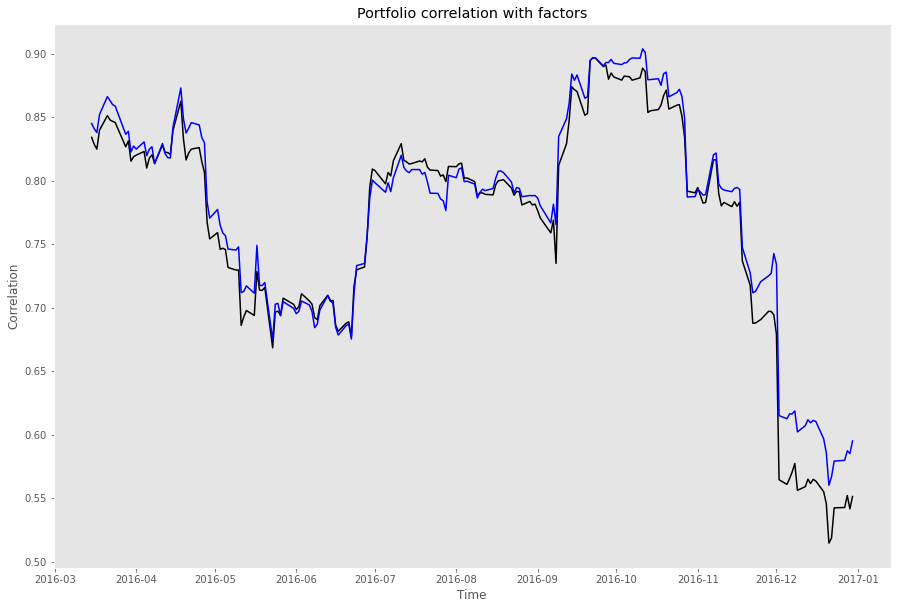

In [51]:
plt.style.use('ggplot')
fig , ax = plt.subplots(figsize=(15,10))
ax.plot(portfolio_fact['corr_sp500'],color='black')
ax.plot(portfolio_fact['corr_value_factor'],color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Correlation')
ax.set_title('Portfolio correlation with factors')
ax.grid(False)
plt.show()

**Fama french factor model**

In [52]:
portfolio_factor = pd.read_csv('https://assets.datacamp.com/production/repositories/4745/datasets/cd4884fa086d67c85d89e879e3fc2d95269f16bd/factors_pf_returns.csv')
portfolio_factor.head()

,date,Mkt-RF,SMB,HML,RF,pf_returns
0,2016-01-04,-1.59,-0.83,0.53,0.0,-1.651745
1,2016-01-05,0.12,-0.22,0.01,0.0,0.408161
2,2016-01-06,-1.35,-0.12,0.00,0.0,0.325555
3,2016-01-07,-2.44,-0.29,0.08,0.0,-0.698259
4,2016-01-08,-1.11,-0.47,-0.03,0.0,-0.959352


In [53]:
portfolio_factor.set_index('date',inplace=True)

In [54]:
portfolio_factor.index = pd.to_datetime(portfolio_factor.index)

In [55]:
portfolio_factor.head()

,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,-1.59,-0.83,0.53,0.0,-1.651745
2016-01-05,0.12,-0.22,0.01,0.0,0.408161
2016-01-06,-1.35,-0.12,0.00,0.0,0.325555
2016-01-07,-2.44,-0.29,0.08,0.0,-0.698259
2016-01-08,-1.11,-0.47,-0.03,0.0,-0.959352


In [56]:
stepwise = sm.OLS(portfolio_factor['pf_returns'],portfolio_factor[['Mkt-RF','SMB','HML']]).fit()

In [57]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Tue, 27 Dec 2022   Prob (F-statistic):                    1.55e-57
Time:                        00:01:11   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
sm.OLS(portfolio_factor['pf_returns'],portfolio_factor[['Mkt-RF','SMB','HML']]).fit().params

Mkt-RF    0.823443
SMB      -0.227198
HML      -0.482598
dtype: float64

**Portfolio optimisation**

In [59]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [60]:
mu = expected_returns.mean_historical_return(portfolio)
sigma = risk_models.sample_cov(portfolio)

In [61]:
ef_1 = EfficientFrontier(mu,sigma)

In [62]:
weights = ef_1.max_sharpe()
weights

OrderedDict([('GE', 0.0),
             ('JPM', 0.4301435848594539),
             ('MSFT', 0.569856415140546),
             ('PG', 0.0)])

In [63]:
ef_1.portfolio_performance(verbose=True)

Expected annual return: 19.9%
Annual volatility: 19.1%
Sharpe Ratio: 0.94


(0.19891102843432645, 0.19099492309927402, 0.9367318540783062)

In [64]:
ef_2 = EfficientFrontier(mu,sigma)

In [65]:
weights = ef_2.min_volatility()
weights

OrderedDict([('GE', 0.1584701819817765),
             ('JPM', 0.1163325137280976),
             ('MSFT', 0.0451947032013797),
             ('PG', 0.6800026010887462)])

In [66]:
ef_2.portfolio_performance(verbose=True)

Expected annual return: -2.6%
Annual volatility: 13.0%
Sharpe Ratio: -0.36


(-0.026492429387293168, 0.129571908249066, -0.3588156570012413)

In [67]:
ef_1.clean_weights()

OrderedDict([('GE', 0.0), ('JPM', 0.43014), ('MSFT', 0.56986), ('PG', 0.0)])

In [68]:
ef_2.clean_weights()

OrderedDict([('GE', 0.15847),
             ('JPM', 0.11633),
             ('MSFT', 0.04519),
             ('PG', 0.68)])

In [69]:
ef_3 = EfficientFrontier(mu,sigma)

In [70]:
weights = ef_3.efficient_return(0.2)
ef_3.clean_weights()

OrderedDict([('GE', 0.0), ('JPM', 0.39978), ('MSFT', 0.60022), ('PG', 0.0)])

In [71]:
ef_3.portfolio_performance(verbose=True)

Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.2, 0.19227410775051842, 0.9361634913087495)

In [72]:
ef_4 = EfficientFrontier(mu,sigma)

In [73]:
weights = ef_4.efficient_risk(0.15)
ef_4.clean_weights()

OrderedDict([('GE', 0.0), ('JPM', 0.3538), ('MSFT', 0.28398), ('PG', 0.36222)])

In [74]:
ef_4.portfolio_performance(verbose=True)

Expected annual return: 10.8%
Annual volatility: 15.0%
Sharpe Ratio: 0.59


(0.10804016023353585, 0.1500000000105237, 0.5869344015157276)

**Exponentially weighted returns & risks**

In [75]:
mu = expected_returns.ema_historical_return(portfolio,span=252,frequency=252)
sigma = risk_models.exp_cov(portfolio,span=252,frequency=252)

In [76]:
ef_5 = EfficientFrontier(mu,sigma)

In [77]:
weights = ef_5.max_sharpe()
ef_5.clean_weights()

OrderedDict([('GE', 0.0), ('JPM', 0.33277), ('MSFT', 0.66723), ('PG', 0.0)])

In [78]:
ef_5.portfolio_performance(verbose=True)

Expected annual return: 27.3%
Annual volatility: 20.4%
Sharpe Ratio: 1.24


(0.27302461222701896, 0.20415965394350863, 1.2393467922757713)

In [79]:
ef_6 = EfficientFrontier(mu,sigma)

In [80]:
weights = ef_6.min_volatility()
ef_6.clean_weights()

OrderedDict([('GE', 0.08893),
             ('JPM', 0.15444),
             ('MSFT', 0.09135),
             ('PG', 0.66528)])

In [81]:
ef_6.portfolio_performance(verbose=True)

Expected annual return: -11.2%
Annual volatility: 12.7%
Sharpe Ratio: -1.04


(-0.11174077872402338, 0.12650445699560522, -1.0413923892705224)

In [82]:
ef_7 = EfficientFrontier(mu,sigma)

In [83]:
weights = ef_7.efficient_return(0.2)
weights

OrderedDict([('GE', 0.0),
             ('JPM', 0.4915879438301279),
             ('MSFT', 0.3884891349269475),
             ('PG', 0.1199229212429247)])

In [84]:
ef_7.portfolio_performance(verbose=True)

Expected annual return: 20.0%
Annual volatility: 17.5%
Sharpe Ratio: 1.03


(0.2, 0.17536492457356725, 1.0264310291108887)

In [85]:
ef_8 = EfficientFrontier(mu,sigma)

In [86]:
weights = ef_8.efficient_risk(0.15)
weights

OrderedDict([('GE', 1.753543e-10),
             ('JPM', 0.3936820456355967),
             ('MSFT', 0.2811924142566848),
             ('PG', 0.3251255399324404)])

In [87]:
ef_8.portfolio_performance(verbose=True)

Expected annual return: 10.8%
Annual volatility: 15.0%
Sharpe Ratio: 0.59


(0.10827288809668395, 0.15000000009210337, 0.588485920283216)